# Salary Prediction of Data Professions
## 1. Introduction

**Objective:** Predict the salaries of data professionals using various machine learning regression models.

**Dataset Overview:** The dataset contains information about data professionals, including their demographics, job details, and performance metrics.

## 2. Importing Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('Salary Prediction of Data Professions.csv')
data.head()

FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3

## 3. Exploratory Data Analysis (EDA)

### Data Summary

In [2]:
# Summary statistics
data.describe()

AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000

In [3]:
# Check for missing values
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

### Handling Missing Values

In [4]:
# Remove rows with null values
data.dropna(inplace=True)

# Verify that there are no more missing values
data.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

### Data Visualization

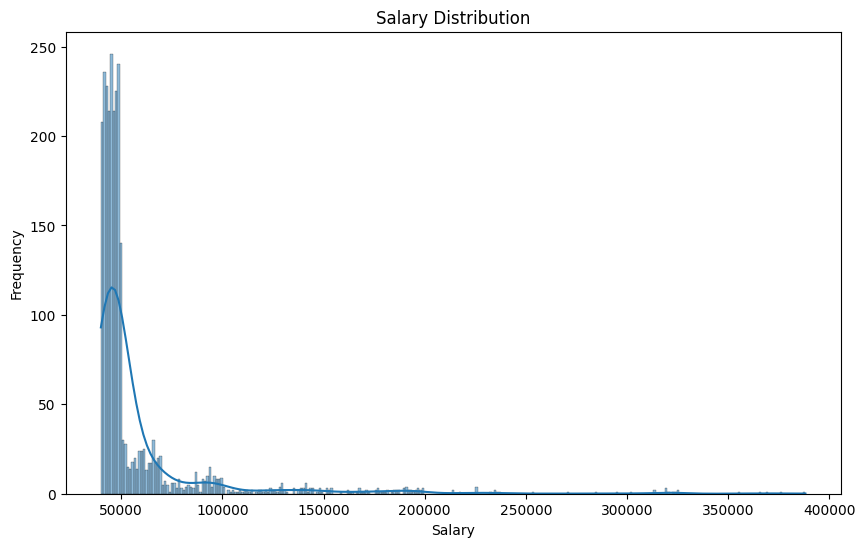

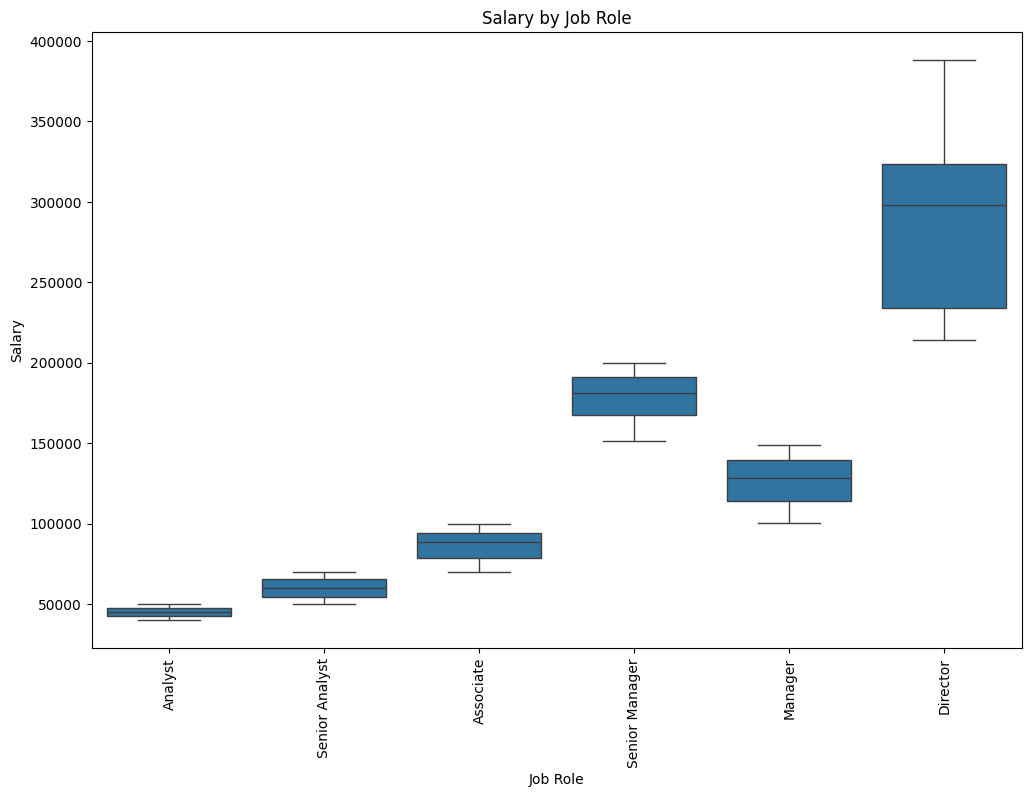

In [5]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Explanation: The histogram shows the distribution of salaries in the dataset. This helps us understand the central tendency and spread of salary values, which is essential for predicting salaries accurately.

# Salary by Job Role
plt.figure(figsize=(12, 8))
sns.boxplot(x='DESIGNATION', y='SALARY', data=data)
plt.title('Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

# Explanation: The boxplot shows the distribution of salaries across different job roles. This helps identify which roles have higher or lower salaries and the variability within each role.

### Additional Visualizations

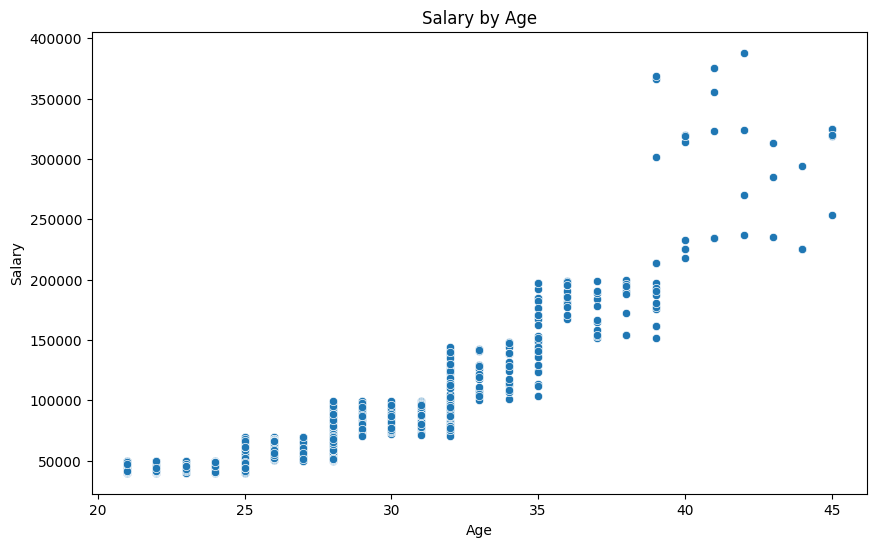

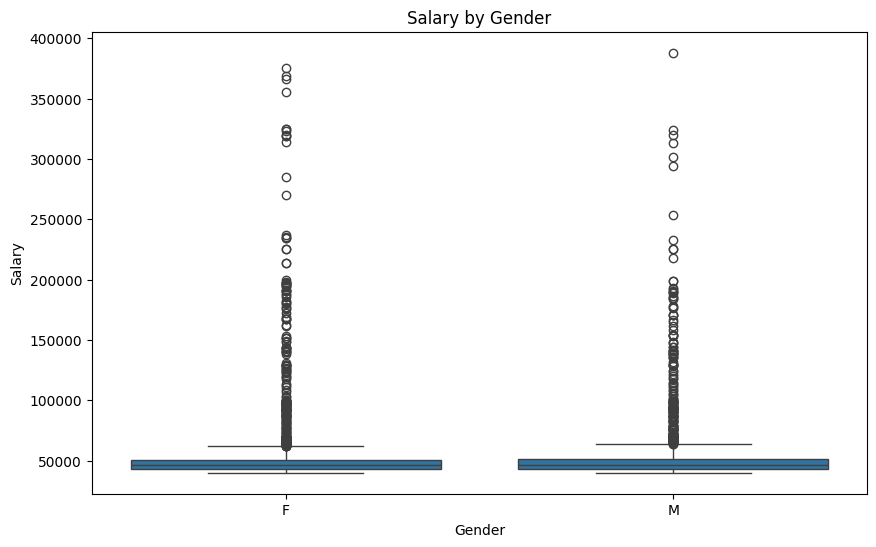

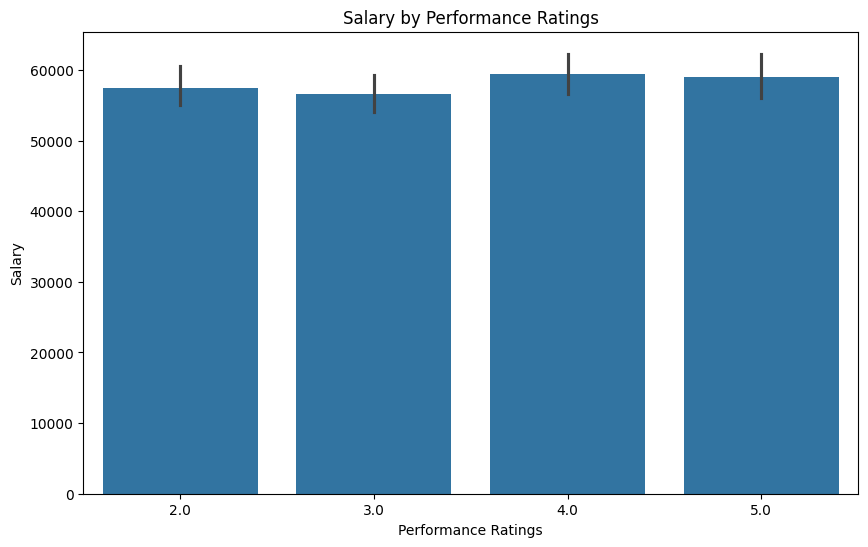

In [6]:
# Salary by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=data)
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Explanation: The scatter plot shows the relationship between age and salary. This helps determine if older employees tend to earn more and identify any age-related salary trends.

# Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='SALARY', data=data)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Explanation: The boxplot shows the salary distribution for different genders. This helps identify any gender pay gap in the dataset.

# Salary by Performance Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='RATINGS', y='SALARY', data=data)
plt.title('Salary by Performance Ratings')
plt.xlabel('Performance Ratings')
plt.ylabel('Salary')
plt.show()

# Explanation: The bar plot shows the average salary for each performance rating. This helps understand the impact of performance on salary.


## 4. Feature Engineering
### Creating New Features

In [7]:
# Example: Extract tenure from DOJ and CURRENT DATE
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'])
data['TENURE'] = (data['CURRENT DATE'] - data['DOJ']).dt.days / 365.25

# Encode categorical variables
data = pd.get_dummies(data, columns=['SEX', 'DESIGNATION', 'UNIT'], drop_first=True)

data.head()

FIRST NAME LAST NAME        DOJ CURRENT DATE   AGE  SALARY  LEAVES USED  \
0     TOMASA     ARMEN 2014-05-18   2016-01-07  21.0   44570         24.0   
2      OLIVE      ANCY 2014-07-28   2016-01-07  21.0   40955         23.0   
3     CHERRY   AQUILAR 2013-04-03   2016-01-07  22.0   45550         22.0   
6     ELLIOT    AGULAR 2013-09-02   2016-01-07  22.0   40339         19.0   
8      KATHY     ALSOP 2014-06-29   2016-01-07  28.0   63478         20.0   

   LEAVES REMAINING  RATINGS  PAST EXP  ...  DESIGNATION_Associate  \
0               6.0      2.0         0  ...                  False   
2               7.0      3.0         0  ...                  False   
3               8.0      3.0         0  ...                  False   
6              11.0      5.0         0  ...                  False   
8              10.0      3.0         1  ...                  False   

   DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                 False                False                       False   
2                 False                False                       False   
3                 False                False                       False   
6                 False                False                       False   
8                 False                False                        True   

   DESIGNATION_Senior Manager  UNIT_IT  UNIT_Management  UNIT_Marketing  \
0                       False    False            False           False   
2                       False    False            False           False   
3                       False     True            False           False   
6                       False    False            False            True   
8                       False    False            False           False   

   UNIT_Operations  UNIT_Web  
0            False     False  
2            False     False  
3            False     False  
6            False     False  
8             True     False  

[5 rows x 22 columns]

## 5. Data Preprocessing
### Handling Missing Values

In [8]:
# Fill missing values with median or mean for numerical columns
data['PAST EXP'].fillna(data['PAST EXP'].median(), inplace=True)
data['RATINGS'].fillna(data['RATINGS'].mean(), inplace=True)

# Explanation: Filling missing values ensures that the model can use all available data without errors. Using median or mean values prevents distortion of the data distribution.

### Scaling Features

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['AGE', 'PAST EXP', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'TENURE']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head()

FIRST NAME LAST NAME        DOJ CURRENT DATE       AGE  SALARY  LEAVES USED  \
0     TOMASA     ARMEN 2014-05-18   2016-01-07 -0.961804   44570     0.326224   
2      OLIVE      ANCY 2014-07-28   2016-01-07 -0.961804   40955     0.108934   
3     CHERRY   AQUILAR 2013-04-03   2016-01-07 -0.705654   45550    -0.108356   
6     ELLIOT    AGULAR 2013-09-02   2016-01-07 -0.705654   40339    -0.760227   
8      KATHY     ALSOP 2014-06-29   2016-01-07  0.831246   63478    -0.542937   

   LEAVES REMAINING   RATINGS  PAST EXP  ...  DESIGNATION_Associate  \
0         -0.326224 -1.334344 -0.573447  ...                  False   
2         -0.108934 -0.436707 -0.573447  ...                  False   
3          0.108356 -0.436707 -0.573447  ...                  False   
6          0.760227  1.358567 -0.573447  ...                  False   
8          0.542937 -0.436707 -0.206536  ...                  False   

   DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                 False                False                       False   
2                 False                False                       False   
3                 False                False                       False   
6                 False                False                       False   
8                 False                False                        True   

   DESIGNATION_Senior Manager  UNIT_IT  UNIT_Management  UNIT_Marketing  \
0                       False    False            False           False   
2                       False    False            False           False   
3                       False     True            False           False   
6                       False    False            False            True   
8                       False    False            False           False   

   UNIT_Operations  UNIT_Web  
0            False     False  
2            False     False  
3            False     False  
6            False     False  
8             True     False  

[5 rows x 22 columns]

## 6. Machine Learning Model Development
### Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'SALARY'])
y = data['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Various Models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

## 7. Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name}:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2: {r2_score(y_test, y_pred)}\n')

Linear Regression:
MAE: 4026.7808774035466
MSE: 46753532.101030886
RMSE: 6837.6554535184705
R2: 0.9626399702009056

Decision Tree:
MAE: 4797.781783681215
MSE: 82023424.6166983
RMSE: 9056.678453864766
R2: 0.9344563405117354

Random Forest:
MAE: 4122.932877925365
MSE: 52423293.7269446
RMSE: 7240.393202509419
R2: 0.9581093507208593

Gradient Boosting:
MAE: 4188.507443116603
MSE: 52935789.40544618
RMSE: 7275.698551029047
R2: 0.9576998232913734



## 8. ML Pipelines and Model Deployment
### Creating ML Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Recreate the list of columns
numerical_features = ['AGE', 'PAST EXP', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'TENURE']
categorical_features = [col for col in X.columns if col not in numerical_features]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])
pipeline.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(pipeline, 'salary_model.pkl')

['salary_model.pkl']

### Model Deployment Example (Flask)

In [14]:
# Flask App (save this as app.py)
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('salary_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1